In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Implementing Q-Learning Algorithm

In [3]:
#Make environment
env = gym.make("CartPole-v1")

# Define parameters
learning_rate = 0.05
epsilon = 1
e_depreciation = 0.9999
discount_factor = 0.9999
train_episodes = 50_000

# Initialize arrays to save progress
episode_i = [] 
reward_i = []

#discretize ranges from documentation
pos_space = np.linspace(-2.4,2.4,20)
vel_space = np.linspace(-4,4,20)
angle_space = np.linspace(-0.2095,0.2095,20)
av_space = np.linspace(-4,4,20)

#set up Q-Table
Q = np.zeros((20, 20, 20, 20, env.action_space.n)) #zeroes
#Q = np.random.rand(10, 10, 10, 10, env.action_space.n) # random values

In [4]:
def discretize_state(state):
    pos, vel, angle, av = state
    pos_bin = np.digitize(pos, pos_space) - 1  # Subtract 1 to make 0-based
    vel_bin = np.digitize(vel, vel_space) - 1
    angle_bin = np.digitize(angle, angle_space) - 1
    av_bin = np.digitize(av, av_space) - 1
    return pos_bin, vel_bin, angle_bin, av_bin
    
def plot_smooth_rewards(episode_i, reward_i): #function for plotting saved progress/reward
    # Apply a moving average (with a window size of 100)
    window_size = 100
    smoothed_rewards = np.convolve(reward_i, np.ones(window_size)/window_size, mode='valid')
    
    # Plot the original and smoothed data
    plt.plot(episode_i, reward_i, label='Original Rewards', alpha=0.3)  # Original data with reduced opacity
    plt.plot(episode_i[window_size-1:], smoothed_rewards, label=f'Smoothed Rewards (window={window_size})', color='red')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend()
    plt.title('Training Progress with Smoothed Rewards')
    plt.show()
    plt.savefig("reward_progress.png")

Episode 10000/50000, Mean Reward (n-100): 82.91
Episode 20000/50000, Mean Reward (n-100): 376.7
Episode 30000/50000, Mean Reward (n-100): 406.61
Episode 40000/50000, Mean Reward (n-100): 498.69
Episode 50000/50000, Mean Reward (n-100): 500.0
Training complete!


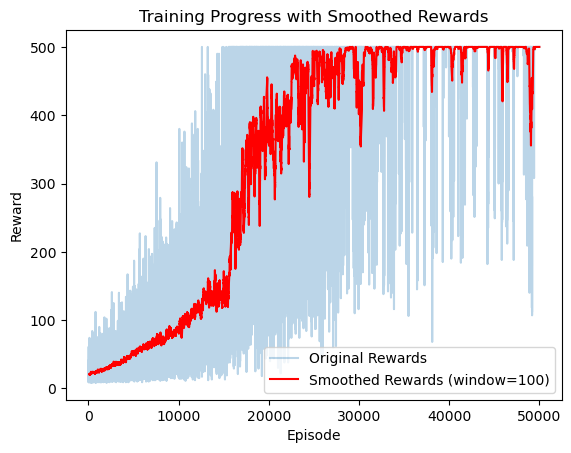

<Figure size 640x480 with 0 Axes>

In [5]:
# Training

for episode in range(train_episodes):
    # Reset environment and discretize the initial state
    state = discretize_state(env.reset()[0])

    episode_reward = 0
    done = False

    while not done:
        # Choose action: epsilon-greedy strategy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit best Q-value
        
        # Take action and observe results
        next_state_continuous, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state_continuous)  # Discretize next state
        
        # Update Q-value using Q-learning formula
        old_value = Q[state][action]
        next_max = np.max(Q[next_state])  # Best future Q-value
        Q[state][action] = old_value + learning_rate * (reward + discount_factor * next_max - old_value)

        # Transition to the next state
        state = next_state
        episode_reward += reward

        done = terminated or truncated

    # Decay exploration probability
    epsilon = max(epsilon * e_depreciation, 0.01)

    # Print progress every 10,000 episodes
    if (episode + 1) % 10000 == 0:
        print(f"Episode {episode + 1}/{train_episodes}, Mean Reward (n-100): {sum(reward_i[-100:])/100}")
    
    #saving progress
    episode_i.append(episode)
    reward_i.append(episode_reward)

print("Training complete!") 
plot_smooth_rewards(episode_i, reward_i)

## Visualize the agent playing

In [7]:
env = gym.make("CartPole-v1",render_mode="human")
state = discretize_state(env.reset()[0])
done = False
total_reward = 0

while not done:    
        action = np.argmax(Q[state])  # Exploit best Q-value
        
        # Take action and observe results
        next_state_continuous, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize_state(next_state_continuous)  # Discretize next state

        done = terminated or truncated

        state = next_state
        
        total_reward += reward

print(f"Total Reward: {total_reward}")
env.close()

2024-12-02 11:13:48.649 python[65748:6471425] +[IMKClient subclass]: chose IMKClient_Modern


Total Reward: 500.0
